In [1]:
import numpy as np
import random
import math
from numpy.linalg import norm, eig
#plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')


##### Noisy gradient $$x_{k+1}=x_k-h\nabla g(x_k), h=\frac{1+\beta}{L(1-\beta)^2}, \|\nabla f(x) - g(x)\|\leq\beta\|\nabla f(x)\| $$

In [14]:
def generate_data(size):
    A = np.random.randn(size,size)
    x = np.random.randn(size)
    b = A.dot(x)
    return A, b, x

def f(x):
    global A, b
    return norm(A@x  - b) ** 2
    
def grad_f(x):
    global A, b
    return 2 * (A @ x - b).T @ A

def def_alpha():
    global A
    #собственные значения матрицы 2* A.T @ A
    eigenvalues, _ = eig(2 *A.T @ A)
    return max(eigenvalues)
    
def grad_descent(num_iter=100):
    global x, size
    f_solution = f(x)
    alpha, beta, eps = def_alpha(), 0.1, 0.001
    H = (1 - beta) / (alpha * (1 + beta) ** 2)
    # в начале градиентного спуска инициализируем значение x какими-нибудь вектором
    cur_x = np.ones(100)
    steps = [[cur_x, f(cur_x)]]
    # итерация цикла -- шаг градиентнго спуска
    while  f(cur_x) - f_solution > eps:
        steps.append([cur_x, f(cur_x)])
        norm_vector = beta * norm(grad_f(cur_x))
        random_vector = np.random.randn(size)
        normalize_vector = random_vector * norm_vector / norm(random_vector)
        cur_x = cur_x - H * (grad_f(cur_x) + normalize_vector)
    steps.append([cur_x, f(cur_x)])
    return np.array(steps)

size = 100
A,b,x = generate_data(size)
steps = grad_descent()
print('x_solution = ', steps[-1][0] , '\n', 'f(x) = %.5f'%steps[-1][1])

x_solution =  [ 0.63216527 -1.24597849 -0.90963987  0.40876363  1.36761241 -1.30768741
 -1.26501919 -0.34214574 -0.58652648  0.47810364  0.70825601 -1.15503247
  0.54615718 -0.22461111  1.33004407  2.22655473 -0.21211847  1.58109932
  0.76058198  0.54013906 -0.37094191  1.07009801 -0.47472557 -0.14485314
  1.26337935  0.33125215  0.50932023 -0.55437653  0.80953508 -0.12598983
  1.21397383  0.0122596  -0.59538893  0.53069401 -0.11247879  0.80069581
 -0.72915652 -0.21556899  0.13765707  0.78910662  0.12299592  0.76340024
  0.81776217 -1.11348939 -0.47308358  1.30898247  0.61591295  0.31654124
  0.43509304  0.65386588  1.30388084 -0.52404058 -0.60864836  0.81086319
 -1.16340471  0.75569386  0.79746254 -0.66523994  0.48425054 -0.90429722
 -1.92180706  0.84842488 -0.45647739 -1.9185376   0.63739812 -0.28035206
 -0.45753786 -0.29488842  0.24910907  0.32671046 -0.84772725  0.32051305
  1.90668522  0.92199746  0.67728224 -0.71397441 -1.82253629  0.09452934
  0.91197199  0.28209598  2.13091632 

In [15]:
print('count of steps = %d'%steps.shape[0])

count of steps = 11378


In [16]:
file = open('solution.txt', 'w')
file.write('step \t function value \n')
for i,step in enumerate(steps):
    file.write('%d \t %f \n'%(i, step[1]))

Text(0, 0.5, 'f(cur_x)')

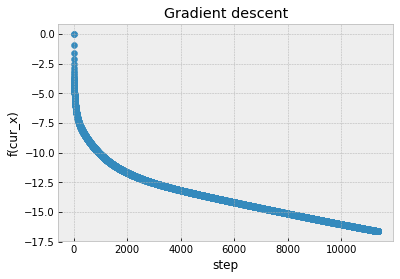

In [17]:
f_solution = f(x)
f_x_0 = f(steps[0][0])
x_axis = [i for i in range(steps.shape[0])]
y_axis = [math.log((f[1] - f_solution)/(f_x_0 - f_solution)) for f in steps]
plt.scatter(x_axis, y_axis)
plt.title('Gradient descent')
plt.xlabel('step')
plt.ylabel('f(cur_x)')